In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df= pd.read_csv("Loan_Prediction[1].csv")
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df.drop('Id',inplace=True,axis=1)

In [7]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
print(df.isna().sum())
df.shape

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


(252000, 12)

In [9]:
df.dropna(inplace=True)



In [10]:
df.shape

(252000, 12)

In [11]:
df['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Married/Single'] = label_encoder.fit_transform(df['Married/Single'])

In [13]:
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [14]:
df.loc[df['House_Ownership']=="norent_noown"]

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
25,1797876,76,20,1,norent_noown,no,Mechanical_engineer,Erode[17],Tamil_Nadu,11,14,0
50,4260004,27,5,1,norent_noown,no,Police_officer,Sagar,Madhya_Pradesh,5,13,0
175,6694786,69,17,1,norent_noown,no,Surveyor,Miryalaguda,Telangana,11,11,1
223,2433481,48,0,1,norent_noown,yes,Biomedical_Engineer,Durg,Chhattisgarh,0,14,0
312,6787542,22,0,1,norent_noown,no,Hotel_Manager,Phusro,Jharkhand,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251887,2747123,52,19,1,norent_noown,yes,Graphic_Designer,Berhampore,West_Bengal,5,14,1
251916,1463152,22,19,1,norent_noown,no,Software_Developer,Haldia,West_Bengal,13,13,0
251934,5762469,22,1,1,norent_noown,no,Dentist,Kumbakonam,Tamil_Nadu,1,12,0
251946,4348278,27,5,1,norent_noown,yes,Secretary,Hubliâ€“Dharwad,Karnataka,5,10,0


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['House_Ownership'] = label_encoder.fit_transform(df['House_Ownership'])

In [16]:
# df['Car_Ownership'].unique().astype(int)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,1,2,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,0,2,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,1,2,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,1,2,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,1,2,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,1,2,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,1,2,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [17]:
df.loc[df['Car_Ownership']=="no","Car_Ownership"]=0
df.loc[df['Car_Ownership']=="yes","Car_Ownership"]=1
df['Car_Ownership']=df['Car_Ownership'].astype(int)

In [18]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [19]:
df['Profession'].nunique()

51

In [20]:
from sklearn.preprocessing import LabelEncoder
L_E=LabelEncoder()
df['Profession']= L_E.fit_transform(df['Profession'])

In [21]:
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [22]:
df['CITY'].nunique()

317

In [23]:
df.shape

(252000, 12)

In [24]:
df['CITY']=L_E.fit_transform(df['CITY'])

In [25]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [26]:
df['STATE'].nunique()

29

In [27]:
df['STATE']=L_E.fit_transform(df['STATE'])

In [28]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   Married/Single     252000 non-null  int32
 4   House_Ownership    252000 non-null  int32
 5   Car_Ownership      252000 non-null  int32
 6   Profession         252000 non-null  int32
 7   CITY               252000 non-null  int32
 8   STATE              252000 non-null  int32
 9   CURRENT_JOB_YRS    252000 non-null  int64
 10  CURRENT_HOUSE_YRS  252000 non-null  int64
 11  Risk_Flag          252000 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 17.3 MB


In [30]:
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [31]:
# sns.pairplot(df, diag_kind='kde')  # 'kde' for kernel density estimate on the diagonal
# plt.suptitle("Pairplot of Loan Dataset Features", fontsize=16)
# plt.show()

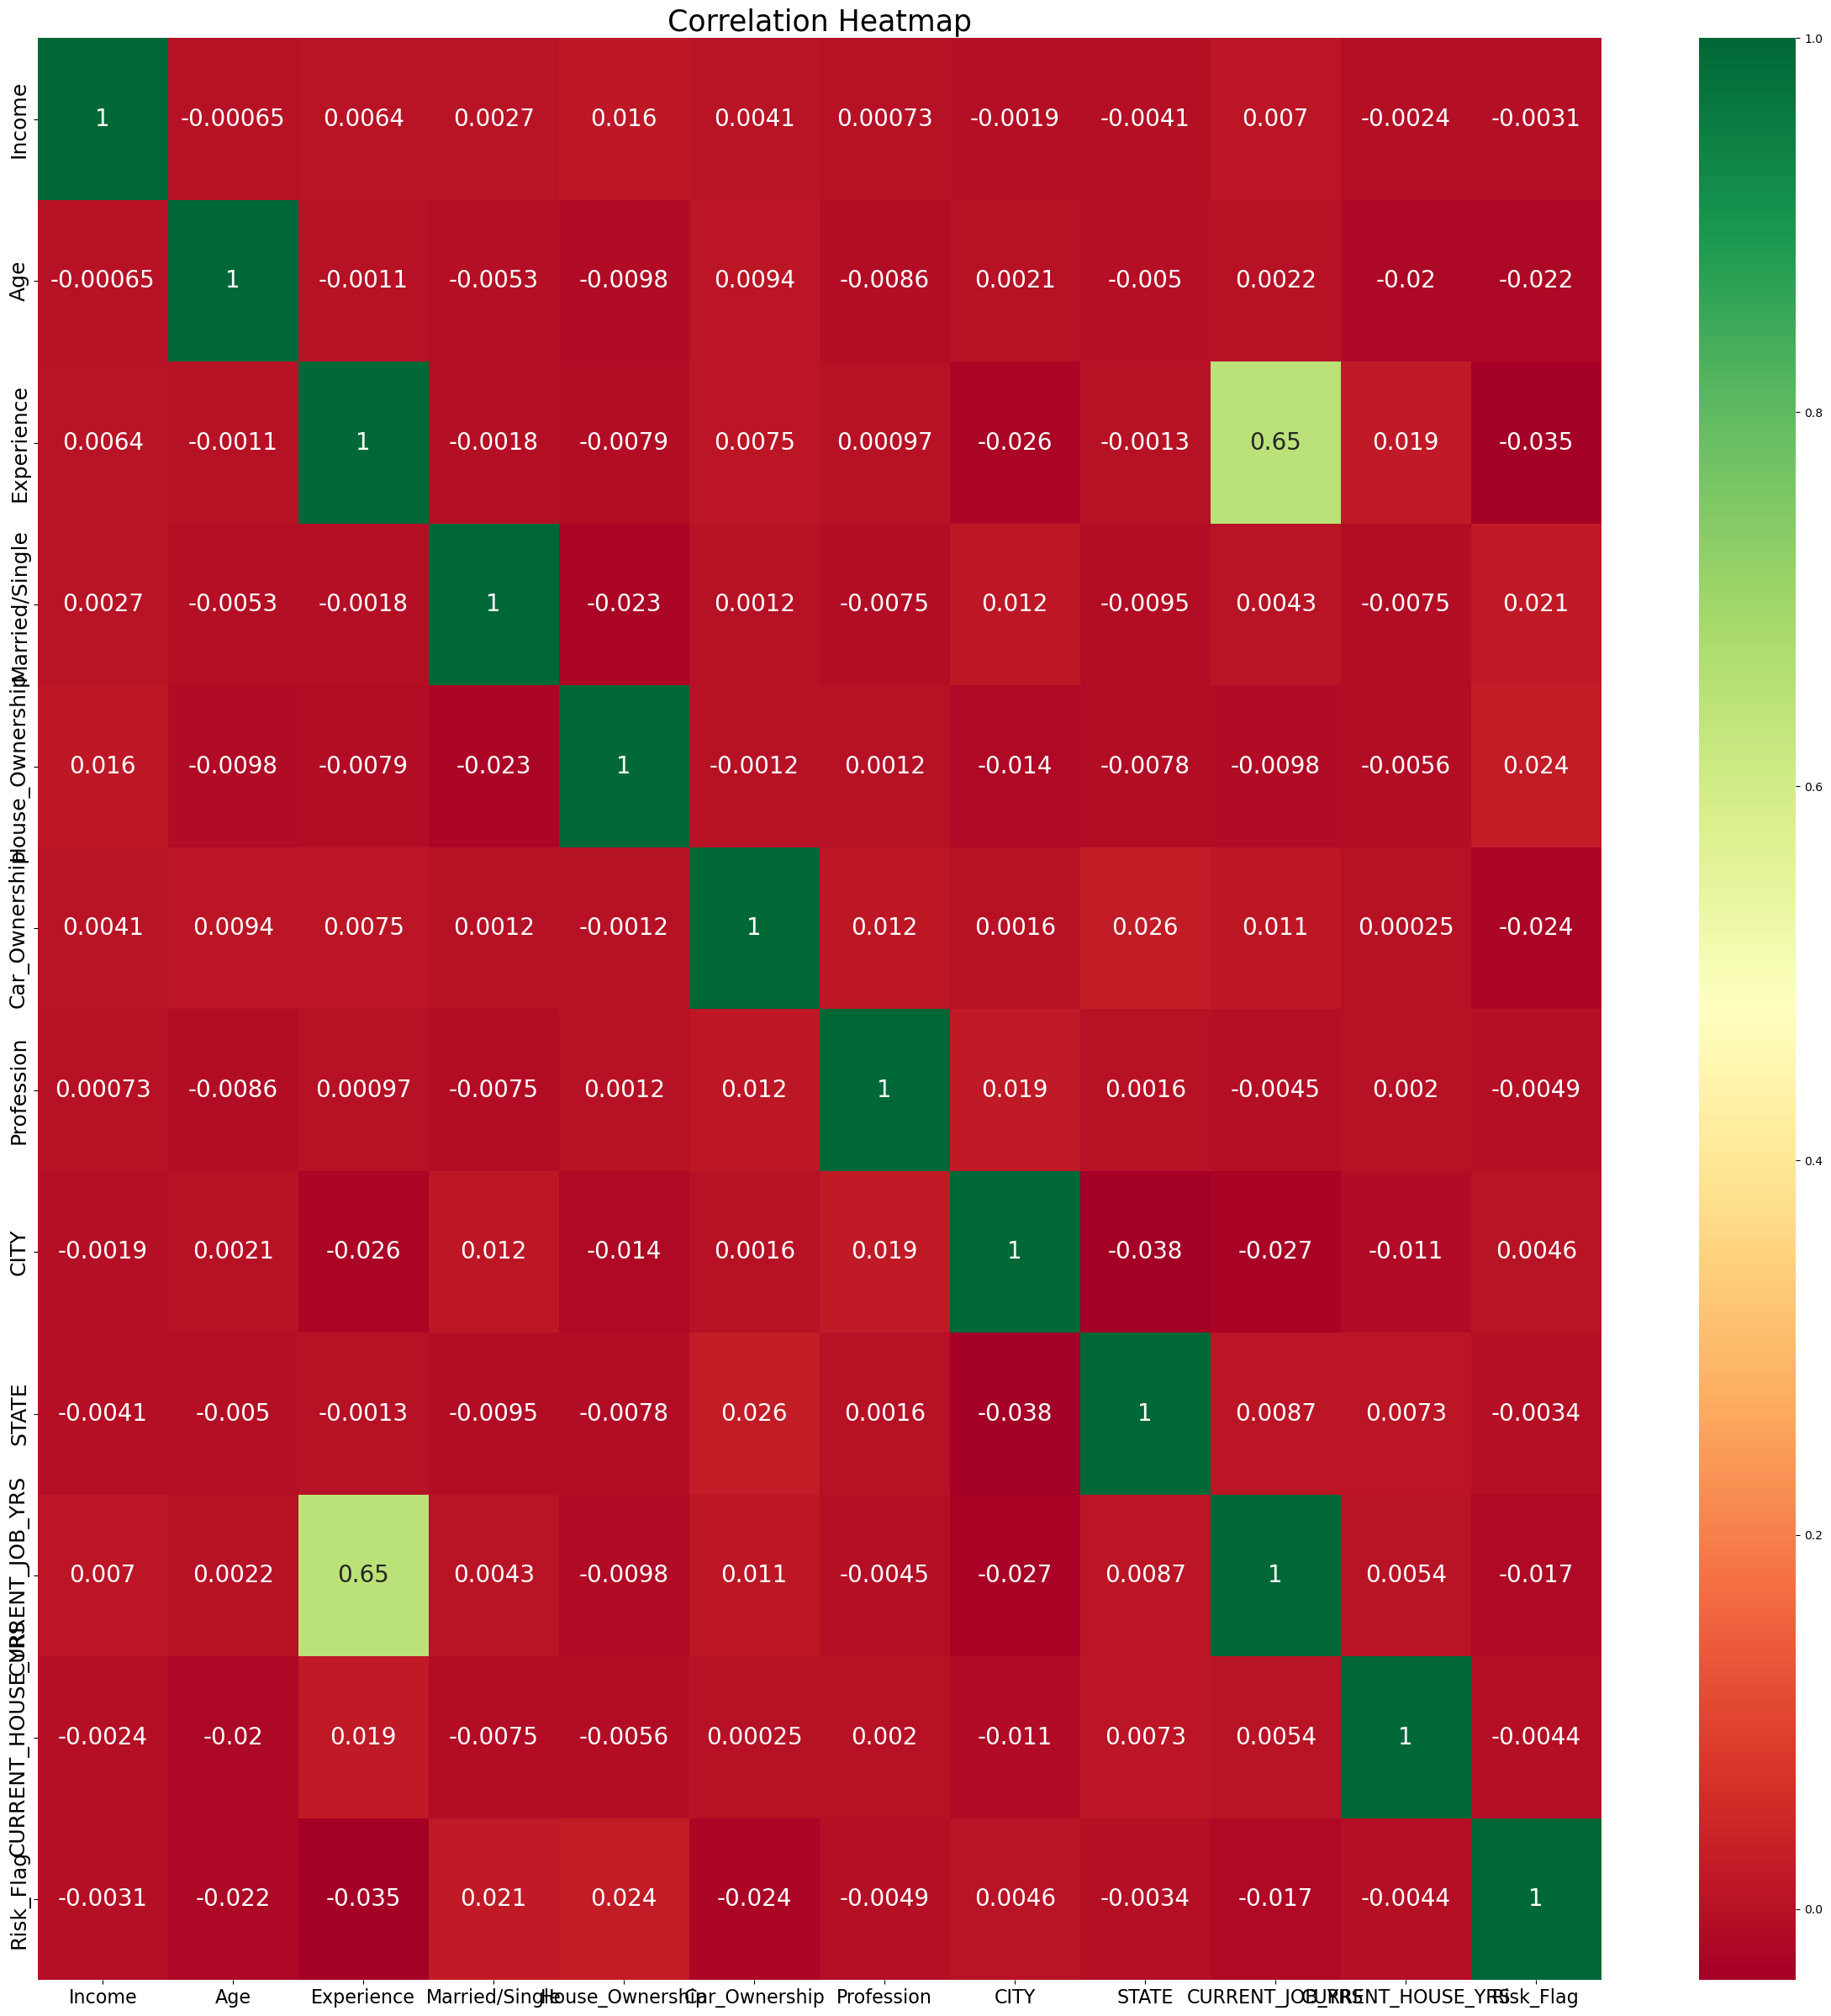

In [32]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})#
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

plt.title("Correlation Heatmap", fontsize=25)  # Increase title size
plt.show()

### "The heatmap clearly shows that in our data, there is no correlation that significantly affects the target output."

In [33]:
X=df.iloc[:,:-1]
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,3,13
1,7574516,40,10,1,2,0,43,227,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,54,17,2,12
4,5768871,47,11,1,2,0,11,296,22,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11
251996,2843572,26,10,1,2,0,3,251,13,6,11
251997,4522448,46,7,1,2,0,17,144,14,7,12
251998,6507128,45,0,1,2,0,27,233,18,0,10


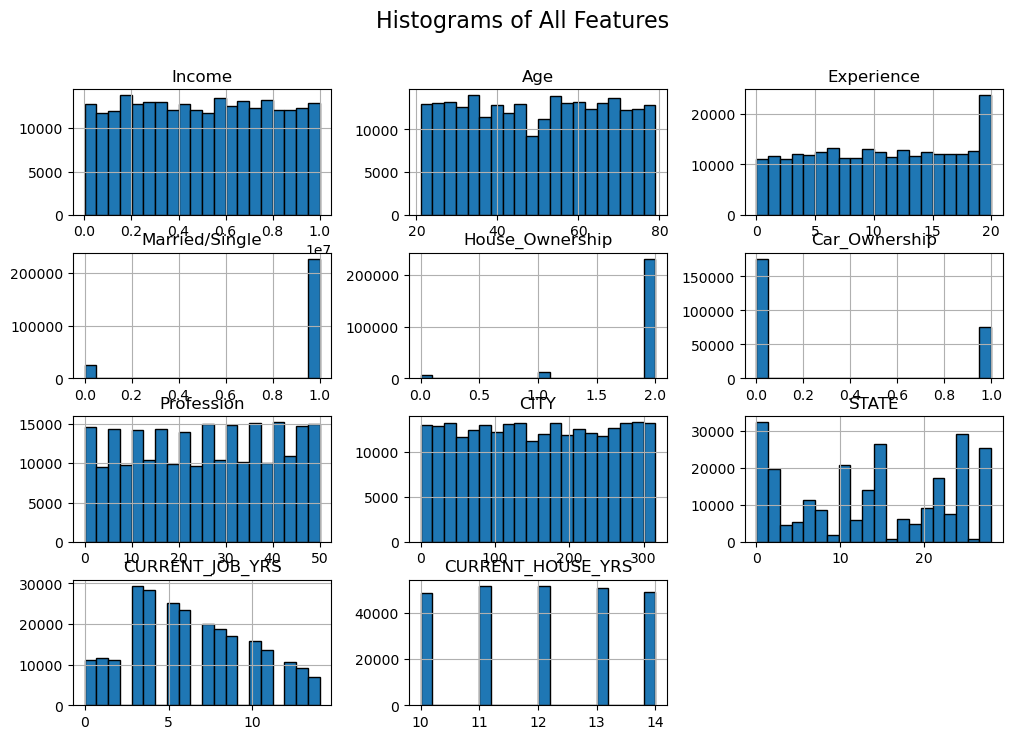

In [34]:
  # Replace with your dataset file

# Plot histogram for each column
X.hist(figsize=(12, 8), bins=20, edgecolor='black')

# Show the plots
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()

### it's seen that data is not in normal Distribution

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00
...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00


 ### MinMaxScaler used for scaled input data in range 0 to 1

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252000 non-null  float64
 1   Age                252000 non-null  float64
 2   Experience         252000 non-null  float64
 3   Married/Single     252000 non-null  float64
 4   House_Ownership    252000 non-null  float64
 5   Car_Ownership      252000 non-null  float64
 6   Profession         252000 non-null  float64
 7   CITY               252000 non-null  float64
 8   STATE              252000 non-null  float64
 9   CURRENT_JOB_YRS    252000 non-null  float64
 10  CURRENT_HOUSE_YRS  252000 non-null  float64
dtypes: float64(11)
memory usage: 21.1 MB


In [37]:
y=df.Risk_Flag
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [38]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV

In [42]:
# param_grid = {
#     'n_estimators': [100],
#     'learning_rate': [0.01],
#     'max_depth': [3],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'subsample': [0.8]
# }

# # Perform Grid Search
# gbmgscv = GridSearchCV(estimator=gb, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [43]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [44]:
pred=gb.predict(X_test)

In [45]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_test

75255     0
192435    0
154839    0
59774     0
63788     0
         ..
8107      1
79394     0
3538      1
220663    0
39562     0
Name: Risk_Flag, Length: 63000, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix# to check model performance
accu_scor=accuracy_score(y_test,pred)
accu_scor

0.8764444444444445

In [48]:
f1_score(y_test,pred)

0.003839262861530586

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     55208
           1       0.68      0.00      0.00      7792

    accuracy                           0.88     63000
   macro avg       0.78      0.50      0.47     63000
weighted avg       0.85      0.88      0.82     63000



In [50]:
confusion_matrix(y_test,pred)

array([[55201,     7],
       [ 7777,    15]], dtype=int64)

#### classification report shows that class 0 (majority class) has good precision and recall, while class 1 (minority class) has an F1-score of 0.00. This happens because:

1️⃣ Recall for Class 1 is 0.00 → The model never correctly predicts class 1.
2️⃣ Precision for Class 1 is 0.68, but since recall is 0, the F1-score also becomes 0.

📉 This means your model completely fails to detect class 1.

#### A highly imbalanced dataset (e.g., 95% class 0, 5% class 1) can cause the model to ignore the minority class.

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
y_resampled.value_counts()

Risk_Flag
0    165796
1    165796
Name: count, dtype: int64

###   RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
predrf=model.predict(X_test)

In [55]:
predrf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
confusion_matrix(y_test,predrf)

array([[50431,  4777],
       [ 1799,  5993]], dtype=int64)

In [57]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     55208
           1       0.56      0.77      0.65      7792

    accuracy                           0.90     63000
   macro avg       0.76      0.84      0.79     63000
weighted avg       0.91      0.90      0.90     63000



## here we solve the unbalance data or  F1 score using SMOTE opration and accuracy is also Increase. we use RandomForest Classifier for balances data and accuracy is is very good that is 90%


In [58]:
from imblearn.over_sampling import SMOTE
gb_=GradientBoostingClassifier
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

gb_ = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_.fit(X_resampled, y_resampled)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [59]:
pred_=gb_.predict(X_test)

In [60]:
pred_

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
y_test

75255     0
192435    0
154839    0
59774     0
63788     0
         ..
8107      1
79394     0
3538      1
220663    0
39562     0
Name: Risk_Flag, Length: 63000, dtype: int64

In [62]:
print(classification_report(pred_,y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     46264
           1       0.61      0.28      0.39     16736

    accuracy                           0.76     63000
   macro avg       0.69      0.61      0.62     63000
weighted avg       0.74      0.76      0.73     63000



### For loan Risk to give or not RandomForest Classifier best result campare to  GradientBoosting Classifier

## FOR same data use for Car_Ownership prediction on same data 

In [63]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [64]:
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [65]:
X=df.drop(columns="Car_Ownership",axis=1)
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,33,251,13,3,13,0
1,7574516,40,10,1,2,43,227,14,9,13,0
2,3991815,66,4,0,2,47,8,12,4,10,0
3,6256451,41,2,1,2,43,54,17,2,12,1
4,5768871,47,11,1,2,11,296,22,3,14,1


In [66]:
y=df.Car_Ownership
y.unique()

array([0, 1])

In [67]:
from sklearn.preprocessing import MinMaxScaler
MMscaler=MinMaxScaler()

In [68]:
x_Scaler=MMscaler.fit_transform(X)

In [69]:
X=pd.DataFrame(x_Scaler,columns=X.columns)
X

,Income,Age,Experience,Married/Single,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,1.0,1.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.22,0.936709,0.785714,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [71]:
X_train[:]

,Income,Age,Experience,Married/Single,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
33554,0.486604,0.327586,0.80,1.0,1.0,0.12,0.107595,0.892857,0.428571,0.75,0.0
141321,0.706272,0.362069,1.00,1.0,1.0,0.16,0.825949,0.071429,0.642857,1.00,0.0
239484,0.196292,0.482759,0.65,1.0,1.0,0.34,0.329114,0.892857,0.357143,0.00,0.0
185819,0.726622,0.241379,0.35,1.0,1.0,0.96,0.037975,0.000000,0.500000,0.00,0.0
32969,0.488138,0.155172,0.00,1.0,0.5,0.14,0.439873,0.714286,0.000000,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110138,0.013081,0.258621,0.85,1.0,1.0,0.30,0.208861,0.071429,0.642857,0.50,1.0
204970,0.124942,0.258621,0.95,1.0,1.0,0.88,0.924051,0.428571,0.785714,0.25,0.0
1020,0.343655,0.810345,0.75,1.0,1.0,0.38,0.645570,0.785714,0.357143,0.50,0.0
196748,0.486656,0.275862,0.60,1.0,1.0,1.00,0.946203,0.785714,0.714286,0.00,0.0


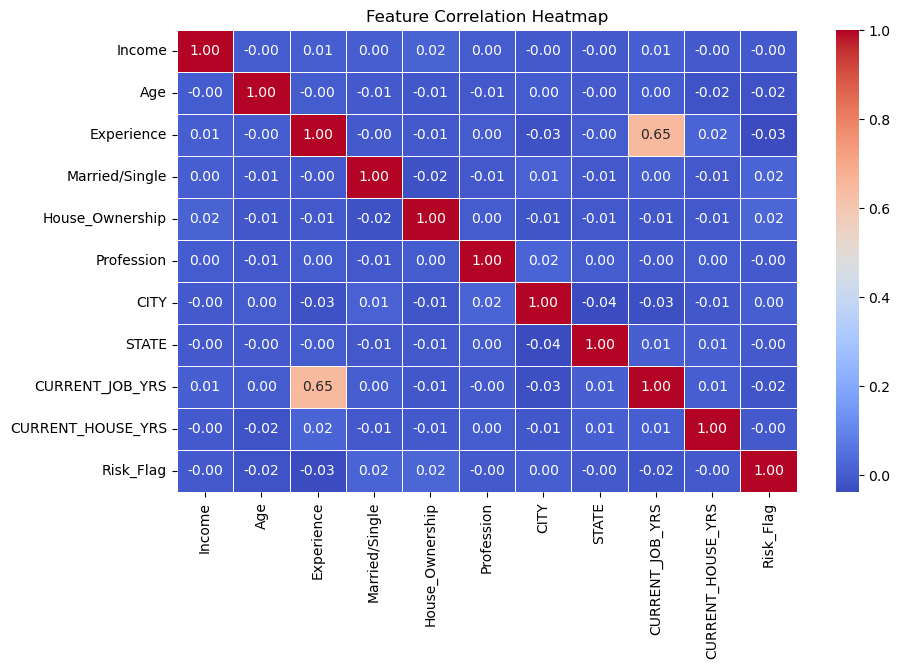

In [72]:
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

stable the the data

In [73]:
y_test.value_counts()

Car_Ownership
0    43937
1    19063
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [75]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [76]:
lor.fit(X_resampled,y_resampled)

LogisticRegression()

In [77]:
prediction=lor.predict(X_test)

In [78]:
prediction

array([1, 0, 1, ..., 0, 0, 0])

In [79]:
y_test

112449    0
54389     1
172778    0
44634     0
74840     0
         ..
178461    0
23669     0
160478    0
99684     1
55971     0
Name: Car_Ownership, Length: 63000, dtype: int32

In [80]:
confusion_matrix(prediction,y_test)

array([[21194,  8663],
       [22743, 10400]], dtype=int64)

In [81]:
accuracy_score(prediction,y_test)

0.5014920634920635

In [82]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.48      0.71      0.57     29857
           1       0.55      0.31      0.40     33143

    accuracy                           0.50     63000
   macro avg       0.51      0.51      0.49     63000
weighted avg       0.52      0.50      0.48     63000



In [83]:
gb_ = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_.fit(X_resampled, y_resampled)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [84]:
pred_gb=gb_.predict(X_test)

In [85]:
print(classification_report(pred_gb,y_test))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80     37487
           1       0.75      0.56      0.64     25513

    accuracy                           0.75     63000
   macro avg       0.75      0.72      0.72     63000
weighted avg       0.75      0.75      0.74     63000



In [87]:
accuracy_score(pred_gb,y_test)*100

74.5015873015873

 ## Car_Ownership prediction  GradientBoosting Classifier has best result is campare to  LogisticRegression and accuracy_score is 74.5%

### MAKE same notebook to predict House_Ownership 

In [89]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [91]:
X=df.drop(columns="House_Ownership",axis=1)
X

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,0,33,251,13,3,13,0
1,7574516,40,10,1,0,43,227,14,9,13,0
2,3991815,66,4,0,0,47,8,12,4,10,0
3,6256451,41,2,1,1,43,54,17,2,12,1
4,5768871,47,11,1,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0,45,162,28,6,11,0
251996,2843572,26,10,1,0,3,251,13,6,11,0
251997,4522448,46,7,1,0,17,144,14,7,12,0
251998,6507128,45,0,1,0,27,233,18,0,10,0


In [93]:
y=df.House_Ownership
y

0         2
1         2
2         2
3         2
4         2
         ..
251995    2
251996    2
251997    2
251998    2
251999    2
Name: House_Ownership, Length: 252000, dtype: int32

In [94]:
y.value_counts()

House_Ownership
2    231898
1     12918
0      7184
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
y1_train.value_counts()

House_Ownership
2    173982
1      9627
0      5391
Name: count, dtype: int64

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1_train, y1_train)

In [103]:
y1_resampled.value_counts()

House_Ownership
2    173982
0    173982
1    173982
Name: count, dtype: int64

In [104]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [105]:
DT.fit(X1_resampled, y1_resampled)

DecisionTreeClassifier()

In [106]:
pred_dt=DT.predict(X1_test)

In [107]:
pred_dt

array([2, 2, 2, ..., 2, 2, 2])

In [108]:
y1_test

75255     2
192435    2
154839    2
59774     2
63788     2
         ..
8107      2
79394     2
3538      2
220663    2
39562     2
Name: House_Ownership, Length: 63000, dtype: int32

In [109]:
confusion_matrix(pred_dt,y1_test)

array([[ 1544,    51,   962],
       [   59,  2916,  1466],
       [  190,   324, 55488]], dtype=int64)

### here the most of test data is unbalance thaat way the confusion_matrix look like diff.

In [110]:
print(classification_report(pred_dt,y1_test))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71      2557
           1       0.89      0.66      0.75      4441
           2       0.96      0.99      0.97     56002

    accuracy                           0.95     63000
   macro avg       0.90      0.75      0.81     63000
weighted avg       0.95      0.95      0.95     63000



## predict House_Ownership on same data we use the decision tree and hyperparamter stander the accuracy is very good is 95%